In [37]:
%load_ext autoreload
%autoreload 2
%xmode Verbose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Exception reporting mode: Verbose


In [43]:
data = pd.read_excel("../../data/real_estate/dataset.xlsx")
data.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3


In [47]:

import time


def f(frac):
    return data.sample(frac=frac).shape

with Pool(processes=4) as pool:         # start 4 worker processes
    result = pool.apply_async(f, (.10,)) # evaluate "f(10)" asynchronously in a single process
    print(result.get(timeout=1))        # prints "100" unless your computer is *very* slow

    print(pool.map(f, np.arange(0.1, 0.8, 0.1)))       # prints "[0, 1, 4,..., 81]"

    it = pool.imap(f, range(10))
    print(next(it))                     # prints "0"
    print(next(it))                     # prints "1"
    print(it.next(timeout=1))           # prints "4" unless your computer is *very* slow

    result = pool.apply_async(time.sleep, (10,))
    print(result.get(timeout=1))

(41, 8)
[(41, 8), (83, 8), (124, 8), (166, 8), (207, 8), (248, 8), (290, 8)]
(0, 8)
(414, 8)


ValueError: Cannot take a larger sample than population when 'replace=False'

In [30]:
def foo(i):
    print (i)
    return i

p = mp.Process(target=foo, args=(3,))
p

<Process(Process-7, initial)>

In [31]:
p.start()

3


100
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
4


TimeoutError: 

In [23]:
random.seed(123)

# Define an output queue
output = mp.Queue()

# define a example function
def rand_string(length, output):
    """ Generates a random string of numbers, lower- and uppercase chars. """
    rand_str = ''.join(random.choice(
                        string.ascii_lowercase
                        + string.ascii_uppercase
                        + string.digits)
                   for i in range(length))
    output.put(rand_str)

# Setup a list of processes that we want to run
processes = [mp.Process(target=rand_string, args=(5, output)) for x in range(4)]

# Run processes
for p in processes:
    p.start()

# Exit the completed processes
for p in processes:
    p.join()

# Get process results from the output queue
results = [output.get() for p in processes]

print(results)

['3mEW5', '8BqsD', 'c6jCv', 'WRjPh']


In [24]:
mp.Queue()

---
## Question 4
Generating a dataset with random noise as Gaussian Distribution.

In [13]:
def dataset_generator(m, c, samples = 50, sigma=10): 
    """assumes random noise comes from
    Gaussian Distribution
    """
    X = np.arange(samples)
    random_noise = np.random.normal(scale=sigma, size=samples)
    Y = m*X + c + random_noise
    return X, Y

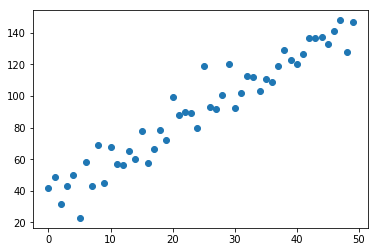

In [21]:
X, Y = dataset_generator(m=2, c=43, samples=50, sigma=10)
plt.scatter(X, Y)

---
## Question 5
Look at the code in ``utils.py`` for the algorithm used. Basically I used Linear congruential generator.

(array([1007.,  980., 1020., 1024.,  991., 1010., 1020.,  948.,  977.,
        1023.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <a list of 10 Patch objects>)

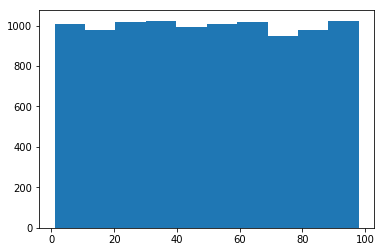

In [6]:
import utils as helper
y = helper.random_list(N = 100, samples = 10000)
plt.hist(y)